In [1]:
import Pkg

Pkg.activate("research",shared=true) # if you have a local shared environment
Pkg.status()

  Activating project at `~/.julia/environments/research`


Status `~/.julia/environments/research/Project.toml`
  [6e4b80f9] BenchmarkTools v1.6.0
  [336ed68f] CSV v0.10.15
  [052768ef] CUDA v5.8.3
  [13f3f980] CairoMakie v0.15.6
  [071ae1c0] DiffEqGPU v3.8.0
  [0c46a032] DifferentialEquations v7.16.1
  [5789e2e9] FileIO v1.17.0
  [5ad8b20f] PhysicalConstants v0.2.4
  [33c8b6b6] ProgressLogging v0.1.5
  [6e0679c1] QuantumOptics v1.2.3
  [6c2fb7c5] QuantumToolbox v0.34.1
  [5d786b92] TerminalLoggers v0.1.7
  [1986cc42] Unitful v1.24.0


In [2]:
using QuantumToolbox
using CairoMakie
using Unitful

using Logging: global_logger
using TerminalLoggers: TerminalLogger
global_logger(TerminalLogger())

CairoMakie.activate!(type = "svg")
include("../scripts/infidelities_funnctions.jl");

 We integrate the Hamiltonian in a rotating frame with rotating wave approximation

## Static motional frequency shift

Hamiltonian in rotating frame:

$$H=\hbar \Omega \hat{S}_\alpha (\hat{a}+\hat{a}^\dagger)+\hbar (\delta+\Delta)\hat{a}^\dagger\hat{a},$$

which is slightly modified from [PRA 105, 022437 (2022)](https://link.aps.org/doi/10.1103/PhysRevA.105.022437) to make it time-independent.

In [66]:
N = 30  
ψ0 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,0) #↓↓
ψ0= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,0) #√1/3 ↓↓ + √2/3 ↑↑
infidelity_static_motional_shift_numerical(1,2e-1,ψ0)

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)


0.021675910191911174

In [18]:
N = 100  

σ1x=sigmax()⊗qeye(2)⊗qeye(N)
σ2x=qeye(2)⊗sigmax()⊗qeye(N)
a=qeye(2)⊗qeye(2)⊗destroy(N)

Ω=1.0
Δ=Ω*4
δ=0e-1*Ω

ϕ=2pi*Ω^2/Δ^2
U_ideal = exp(1im*ϕ*(σ1x+σ2x)^2)

H=Ω*(σ1x+σ2x)*(a+a')+(δ+Δ)*a'*a


Quantum Object:   type=Operator()   dims=[2, 2, 100]   size=(400, 400)   ishermitian=true
400×400 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 1980 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⎥
⎢⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀

In [19]:
ψ0 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,50)
ψend = U_ideal * ψ0
# ψ_bell1= (basis(2,0) ⊗ basis(2,0) + 1im*basis(2,1) ⊗ basis(2,1)) / sqrt(2)
ψ_bell= (basis(2,1) ⊗ basis(2,1) + 1im*basis(2,0) ⊗ basis(2,0)) / sqrt(2)
tlist = range(0,2pi/Δ,100) # a list of time points of interest
eop_ls = [
    a' * a,                      # number operator of cavity
    # (ψ_bell * ψ_bell')⊗qeye(N), # bell state 1
    ψend * ψend',              # ideal end state
];

In [20]:
sol = sesolve(H , ψ0, tlist; e_ops = eop_ls)
1-real(sol.expect[2, end])

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)


2.0283984702329505e-5

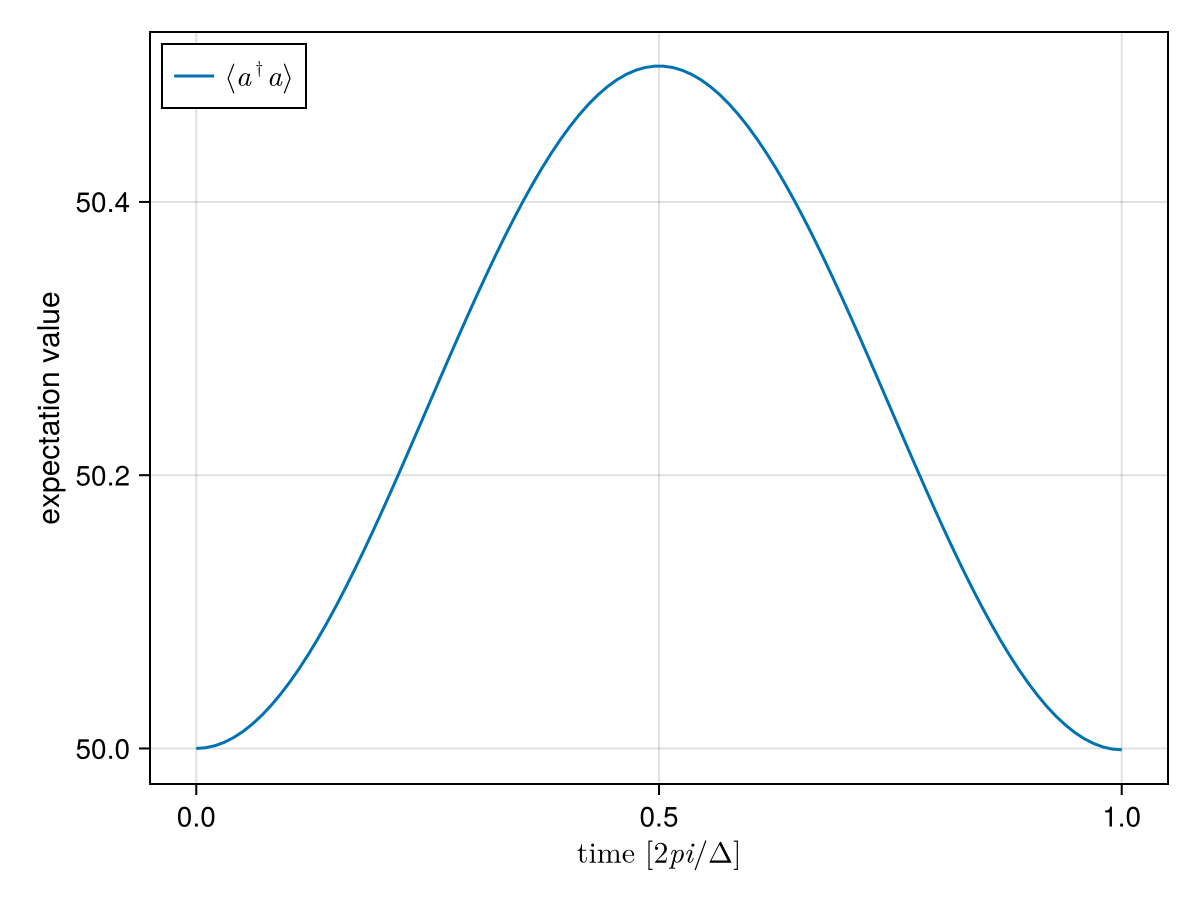

In [22]:
n = real.(sol.expect[1, :])
Pideal = real.(sol.expect[2, :])
# Plotting the results
fig_se = Figure()
ax_se = Axis(
    fig_se[1, 1],
    xlabel = L"time $[2pi/Δ]$", 
    ylabel = "expectation value", 
    xlabelsize = 15, 
    ylabelsize = 15,
)
# xlims!(ax_se, 0, 400)
lines!(ax_se, tlist/(2pi/Δ), n, label = L"$\langle a^\dagger a \rangle$")
# lines!(ax_se, tlist/(2pi/Δ), Pideal, label = L"$P_{ideal}$")
axislegend(ax_se; position = :lt, labelsize = 15)
fig_se

## Trap anharmonicity

In [68]:
N = 500 

σ1x=sigmax()⊗qeye(2)⊗qeye(N)
σ2x=qeye(2)⊗sigmax()⊗qeye(N)
a=qeye(2)⊗qeye(2)⊗destroy(N)

Ω=1.0
Δ=Ω*4
ϵ=6e-5*Ω

ϕ=2pi*Ω^2/Δ^2
U_ideal = exp(1im*ϕ*(σ1x+σ2x)^2)

H=Ω*(σ1x+σ2x)*(a+a')+Δ*a'*a+6ϵ*(a'*a+(a'*a)^2)


Quantum Object:   type=Operator()   dims=[2, 2, 500]   size=(2000, 2000)   ishermitian=true
2000×2000 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 9980 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⎥
⎢⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎣⠀⠀⠀⠀⠀

In [69]:
ψ0 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,50)
ψend = U_ideal * ψ0
# ψ_bell1= (basis(2,0) ⊗ basis(2,0) + 1im*basis(2,1) ⊗ basis(2,1)) / sqrt(2)
ψ_bell= (basis(2,1) ⊗ basis(2,1) + 1im*basis(2,0) ⊗ basis(2,0)) / sqrt(2)
tlist = range(0,2pi/Δ,200) # a list of time points of interest
eop_ls = [
    a' * a,                      # number operator of cavity
    # (ψ_bell * ψ_bell')⊗qeye(N), # bell state 1
    ψend * ψend',              # ideal end state
];

In [70]:
infidelity_trap_anharmonicity_numerical(Ω,ϵ,ψ0)

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)


0.0413550178258677

In [123]:
sol = sesolve(H , ψ0, tlist; e_ops = eop_ls)

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)


Solution of time evolution
(return code: Success)
--------------------------
num_states = 1
num_expect = 2
ODE alg.: OrdinaryDiffEqTsit5.Tsit5{typeof(OrdinaryDiffEqCore.trivial_limiter!), typeof(OrdinaryDiffEqCore.trivial_limiter!), Static.False}(OrdinaryDiffEqCore.trivial_limiter!, OrdinaryDiffEqCore.trivial_limiter!, static(false))
abstol = 1.0e-8
reltol = 1.0e-6


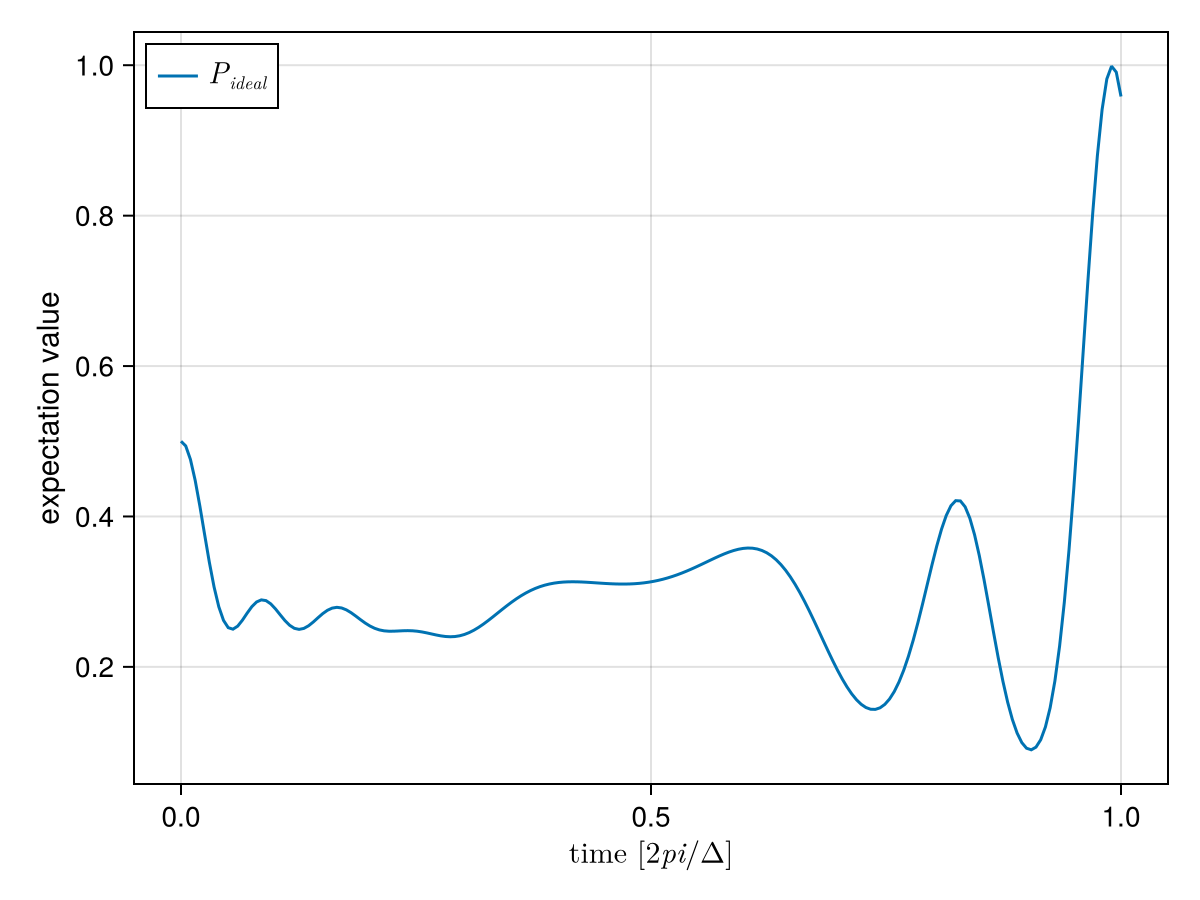

In [125]:
n = real.(sol.expect[1, :])
Pideal = real.(sol.expect[2, :])
# Plotting the results
fig_se = Figure()
ax_se = Axis(
    fig_se[1, 1],
    xlabel = L"time $[2pi/Δ]$", 
    ylabel = "expectation value", 
    xlabelsize = 15, 
    ylabelsize = 15,
)
# xlims!(ax_se, 0, 400)
# lines!(ax_se, tlist/(2pi/Δ), n, label = L"$\langle a^\dagger a \rangle$")
lines!(ax_se, tlist/(2pi/Δ), Pideal, label = L"$P_{ideal}$")
axislegend(ax_se; position = :lt, labelsize = 15)
fig_se

In [126]:
1-Pideal[end]

0.041579675061162114

## Field inhomogeneities

In [71]:
ψ0 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,50)
infidelity_field_inhomogeneity_numerical(1.0,4e-4,ψ0)

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)


0.04086444513894694

## Infidelities from Markovian bath

In [78]:
N = 30
ψ0 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,0)
ψ0= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,0) #√1/3 ↓↓ + √2/3 ↑↑
infidelity_heating_numerical(1,4e-2,ψ0)

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)


0.05743399347528522

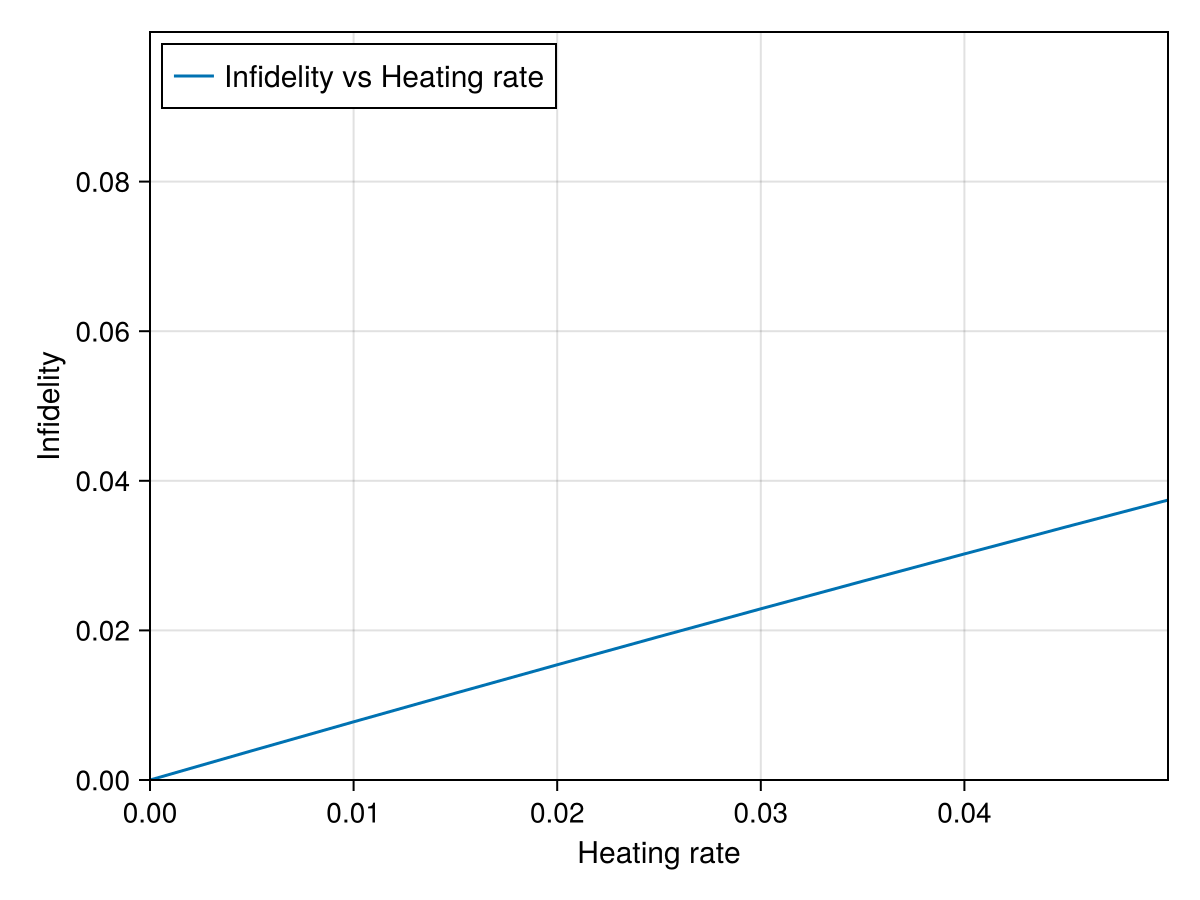

In [83]:
N = 30
ψ0 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,0)
nhs=(0:0.5:5)*1e-2
infidelities = [infidelity_heating_numerical(1,nh,ψ0,progress_bar=Val(false)) for nh in nhs]
fig = Figure()
ax = Axis(fig[1, 1], xlabel = "Heating rate", ylabel = "Infidelity", xlabelsize = 15, ylabelsize = 15)
lines!(ax, nhs, infidelities, label = "Infidelity vs Heating rate")
axislegend(ax; position = :lt, labelsize = 15)
xlims!(ax, 0, 5e-2)
ylims!(ax, 0, 0.1)
fig

In [4]:
N = 150
ψ0 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,50)
infidelity_motional_dephasing_numerical(1,10e-4,ψ0,progress=true)

ODE   0%|█                                              |  ETA: N/A


Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 20s (ETA: 0h 00m 00s)


ODE 100%|███████████████████████████████████████████████| Time: 0:00:18


0.038094206957833054

## Adding Walsh Modulation

In [19]:
function Walsh_1(t)
    if 0<=t<=0.5
        return 1
    elseif 0.5<t<=1.0
        return -1
    else
        ErrorException("t should be normalized to [0,1]")
    end
end
function Walsh_3(t)
    if 0<=t<=0.25
        return 1
    elseif 0.25<t<0.75
        return -1
    elseif 0.75<t<=1.0
        return 1
    else
        ErrorException("t should be normalized to [0,1]")
    end
end

# Utility: number of binary digits needed to represent k
# For example: k=0 → 0,  k=3 (0b11) → 2
@inline bitlen(k::Integer) = k == 0 ? 0 : (sizeof(UInt)*8 - leading_zeros(UInt(k)))

# Utility: map x=1.0 to "just below 1" (so the value at 1 is the left-limit)
@inline to_left1(x::Real) = (xf = float(x); xf == 1 ? prevfloat(xf) : xf)

"""
    walsh(k, x) -> Int8

Stable Walsh function evaluation on [0,1].
- k is the Walsh function index.
- x is in [0,1]. If x==1, we return the left-limit value.
- This implementation automatically chooses the correct dyadic resolution
  based on k, so the result does not change with an arbitrary parameter m.
"""
@inline function walsh(k::Integer, x::Real)::Int8
    xf = to_left1(x)
    @assert 0 ≤ xf ≤ 1 "x must be in [0,1]"
    B = bitlen(k)                           # number of bits needed for k
    B == 0 && return Int8(1)                # W0(x) = +1 everywhere
    N  = UInt(1) << B                       # number of dyadic bins = 2^B
    j  = clamp(floor(UInt, ldexp(xf, B)),   # bin index j = floor(x*2^B)
               UInt(0), N-UInt(1))
    # Value is (-1)^(popcount(k & j))
    return isodd(count_ones(UInt(k) & j)) ? Int8(-1) : Int8(1)
end



walsh

In [27]:
using BenchmarkTools
@btime walsh(7, 0.1)

  1.262 ns (0 allocations: 0 bytes)


1

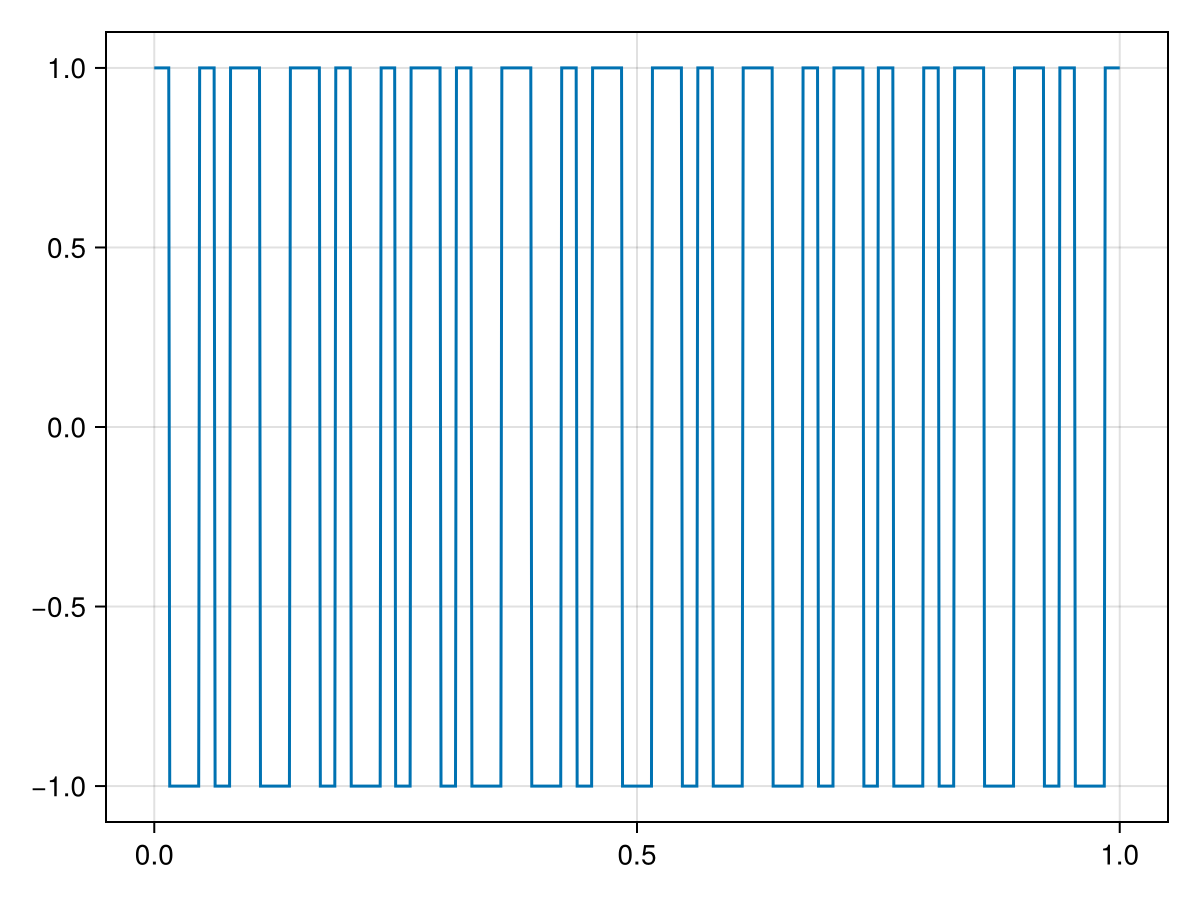

In [39]:
x=0:0.001:1
lines(x,walsh.(2^6-1,x))

In [47]:
function infidelity_static_motional_shift_numerical(Ω,δ,ψ0,Walsh_integer::Int;kwargs...)
    Walsh_index=2^Walsh_integer-1
    # use ψ0 to get the cutoff number of motional states, N
    N = length(ψ0) ÷ 4  # assuming ψ0 is a vector of length 4*N

    modulation_func(p,t)=walsh(p.widx,t/(p.tend))

    σ1x=sigmax()⊗qeye(2)⊗qeye(N)
    σ2x=qeye(2)⊗sigmax()⊗qeye(N)
    a=qeye(2)⊗qeye(2)⊗destroy(N)

    Δ=Ω*4
    Δ1=2^Walsh_integer*Δ

    ϕ=2pi*Ω^2/Δ^2
    U_ideal = exp(1im*ϕ*(σ1x+σ2x)^2)

    ψend = U_ideal * ψ0
    ψend_p=ptrace(ψend,(1,2))

    H0=(δ+Δ1)*a'*a
    # H0=δ*a'*a
    H1=Ω*(σ1x+σ2x)*(a+a')
    H=H0+H1
    
    H_tuple = (
    H0,
    (H1, modulation_func),
    )

    H_t=QobjEvo(H_tuple)

    tlist = [0,2pi/Δ*2^Walsh_integer] # a list of time points of interest
    eop_ls = [
        ψend_p⊗qeye(N),               # ideal end state
    ];

    sol = sesolve(H_t , ψ0, tlist; params = (widx=Walsh_index,tend=tlist[end]),e_ops = eop_ls,kwargs...)
    1-real(sol.expect[1, end])  # infidelity
end

infidelity_static_motional_shift_numerical (generic function with 2 methods)

In [28]:
(a=1,b=2)

(a = 1, b = 2)

In [23]:
N = 30  
ψ0 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,0) #↓↓
ψ0= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,0) #√1/3 ↓↓ + √2/3 ↑↑
Ω=1.0
δ=2e-1
# modulation_func(p,t)=Walsh_1(t/p[1])

0.2

In [48]:
infidelity_static_motional_shift_numerical(Ω,δ,ψ0,1)

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)


0.0007174498196419465

In [80]:
infidelity_static_motional_shift_numerical(Ω,δ,ψ0)

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)


0.021675910191911174

In [35]:
function infidelity_heating_numerical(Ω,nh,ψ0::QuantumObject{Ket},modulation_func;σ=sigmax(),kwargs...)
    N = length(ψ0) ÷ 4  # assuming ψ0 is a vector of length 4*N

    σ1x=σ⊗qeye(2)⊗qeye(N)
    σ2x=qeye(2)⊗σ⊗qeye(N)
    a=qeye(2)⊗qeye(2)⊗destroy(N)

    c_ops = [sqrt(nh) * a,
             sqrt(nh) * a']

    Δ=Ω*4

    ϕ=2pi*Ω^2/Δ^2
    U_ideal = exp(1im*ϕ*(σ1x+σ2x)^2)

    ψend = U_ideal * ψ0

    ψend_p=ptrace(ψend,(1,2))
    
    H0=Δ*a'*a
    H1=Ω*(σ1x+σ2x)*(a+a')
    H=H0+H1
    H_tuple = (
    H0,
    (H1, modulation_func),
    )
    H_t=QobjEvo(H_tuple)

    tlist = [0,2pi/Δ] # a list of time points of interest
    eop_ls = [
        ψend_p⊗qeye(N),              # ideal end state
    ];

    sol = mesolve(H_t, ψ0, tlist, c_ops; params = [tlist[end]], e_ops = eop_ls,kwargs...)
    1-real(sol.expect[1, end])  # infidelity
end

infidelity_heating_numerical (generic function with 2 methods)

In [31]:
N = 30
ψ0 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,0)
ψ0= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,0); #√1/3 ↓↓ + √2/3 ↑↑

In [36]:
infidelity_heating_numerical(1,4e-2,ψ0)

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)


0.05743399347528522

In [37]:
infidelity_heating_numerical(1,4e-2,ψ0,modulation_func)

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)


0.5301295824746147